In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#==================== Part 1: Basic Function ====================

print('Running warmUpExercise ... \n');
print('5x5 Identity Matrix: \n');
%run warmUpExercise.ipynb
warmUpExercise()

Running warmUpExercise ... 

5x5 Identity Matrix: 



array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [3]:
data = np.loadtxt('ex1data1.txt', comments='#', delimiter=",");

In [4]:
#print(data)

X = data[:, 0]; y = data[:, 1];
y = np.c_[y];
m = len(y);
#print(np.transpose(y))
y.shape

(97, 1)

In [5]:
clear all

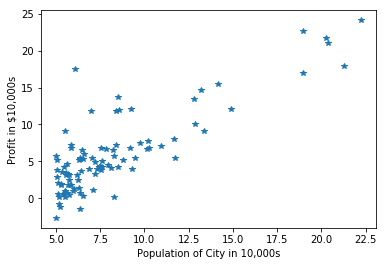

In [6]:
#======================= Part 2: Plotting =======================
#Plot data
#plt.plot(X,y)

plt.plot(X, y, '*');
plt.ylabel('Profit in $10,000s');
plt.xlabel('Population of City in 10,000s');
plt.show();


In [7]:
#=================== Part 3: Cost and Gradient descent ===================
once_array =  [np.ones(m, dtype=int)];
X = np.concatenate((once_array, [data[:,0]]));
theta = np.zeros((2, 1), int); # initialize fitting parameters

#X = np.c_[np.ones(X.shape),X]

print(X)

%run computeCost.ipynb
J = computeCost(X.T, y, theta);

print('With theta = [0 ; 0]\nCost computed =\n', J);
print('Expected cost value (approx) 32.07\n');

theta = np.zeros((2, 1), int);

J = computeCost(X.T, y, np.array([[-1], [2]]));
print('\nWith theta = [-1 ; 2]\nCost computed = \n', J);
print('Expected cost value (approx) 54.24\n');



[[ 1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.      1.      1.
   1.      1.      1.      1.      1.      1.      1.    ]
 [ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
   5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
   6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
  10.957  13.176  22

In [8]:
# Some gradient descent settings
iterations = 1500;
alpha = 0.01;
print('\nRunning Gradient Descent ...\n')
%run gradientDescent.ipynb
[J_history, theta] = gradientDescent(X, y, theta, alpha, iterations);

print('Theta found by gradient descent:\n');
print('%f\n', theta);
print('Expected theta values (approx)\n');
print(' -3.6303\n  1.1664\n\n');

    


Running Gradient Descent ...

Theta found by gradient descent:

%f
 [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approx)

 -3.6303
  1.1664




In [9]:


X.T.shape
    

(97, 2)

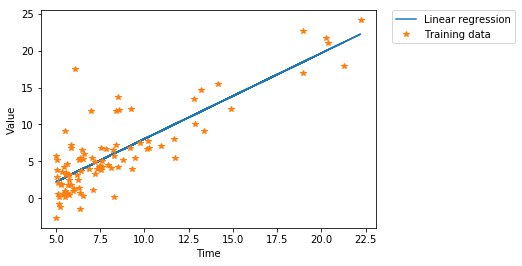

In [10]:
#plot(X(:,2), X*theta, '-')
original_x = X.T[:, 1];
original_x = np.c_[original_x]; #why this?

plt.plot(original_x,  X.T.dot(theta), '-', label="Linear regression" );
plt.plot(original_x, y, '*', label="Training data");
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Value');
plt.xlabel('Time');
plt.show()


Visualizing J(theta_0, theta_1) ...



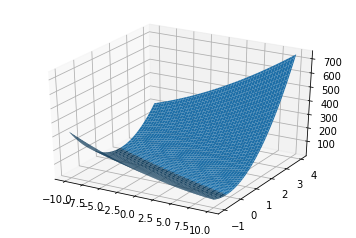

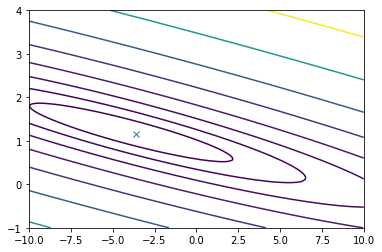

In [11]:
#============= Part 4: Visualizing J(theta_0, theta_1) =============
print('Visualizing J(theta_0, theta_1) ...\n')

#Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)));

for i in range (0,len(theta0_vals)):
    for j in range (0,len(theta1_vals)):
        t = np.array([[theta0_vals[i], theta1_vals[j]]]).T;
        J_vals[i,j] = computeCost(X.T, y, t);
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T;

# Surface plot
#figure;
#surf(theta0_vals, theta1_vals, J_vals)
#xlabel('\theta_0'); ylabel('\theta_1');

fig = plt.figure()
ax = fig.gca(projection='3d');
X, Y = np.meshgrid(theta0_vals, theta1_vals)

# Plot the surface.
surf = ax.plot_surface(X, Y, J_vals)

plt.figure()
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20));
plt.plot(theta[0], theta[1], 'x');
plt.show()